In [1]:
import json
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style
import seaborn as sns

## This sets the plot style
## to have a grid on a dark background
set_style("whitegrid")

In [2]:
# Opening JSON file
f = open('data/train.json')

# parse x:
y = json.load(f)

y

[{'id': 10259,
  'cuisine': 'greek',
  'ingredients': ['romaine lettuce',
   'black olives',
   'grape tomatoes',
   'garlic',
   'pepper',
   'purple onion',
   'seasoning',
   'garbanzo beans',
   'feta cheese crumbles']},
 {'id': 25693,
  'cuisine': 'southern_us',
  'ingredients': ['plain flour',
   'ground pepper',
   'salt',
   'tomatoes',
   'ground black pepper',
   'thyme',
   'eggs',
   'green tomatoes',
   'yellow corn meal',
   'milk',
   'vegetable oil']},
 {'id': 20130,
  'cuisine': 'filipino',
  'ingredients': ['eggs',
   'pepper',
   'salt',
   'mayonaise',
   'cooking oil',
   'green chilies',
   'grilled chicken breasts',
   'garlic powder',
   'yellow onion',
   'soy sauce',
   'butter',
   'chicken livers']},
 {'id': 22213,
  'cuisine': 'indian',
  'ingredients': ['water', 'vegetable oil', 'wheat', 'salt']},
 {'id': 13162,
  'cuisine': 'indian',
  'ingredients': ['black pepper',
   'shallots',
   'cornflour',
   'cayenne pepper',
   'onions',
   'garlic paste',
   'm

In [3]:
y[0]

{'id': 10259,
 'cuisine': 'greek',
 'ingredients': ['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles']}

-> 9 ingredients

### Training set in a DataFrame.

In [4]:
import pandas as pd

df = pd.DataFrame(y)


df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


There is no missing data point.

In [6]:
df['cuisine'].nunique()

20

In [7]:
df['cuisine'].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

There are 20 cuisines.

### recipe-counts by cuisine

In [8]:
df['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [9]:
df['cuisine'].value_counts()/39774

italian         0.197063
mexican         0.161865
southern_us     0.108614
indian          0.075502
chinese         0.067205
french          0.066526
cajun_creole    0.038870
thai            0.038694
japanese        0.035777
greek           0.029542
spanish         0.024865
korean          0.020868
vietnamese      0.020742
moroccan        0.020642
british         0.020214
filipino        0.018982
irish           0.016770
jamaican        0.013225
russian         0.012294
brazilian       0.011741
Name: cuisine, dtype: float64

The distribution of the recipes by cuisine is not uniform. 'italian' takes 20% for maximum, mexican is followed for 16%, and brazilian is 1% for the minimum.

array([<AxesSubplot:ylabel='cuisine'>], dtype=object)

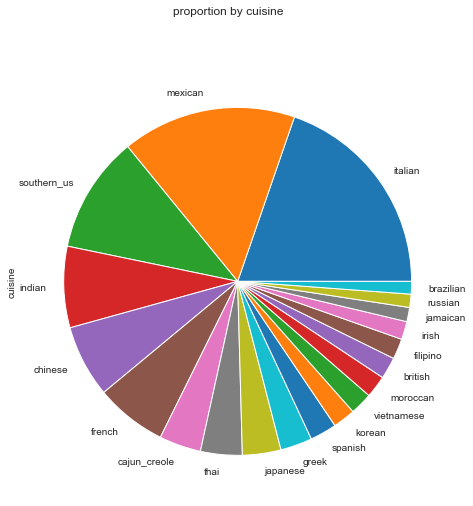

In [10]:
df['cuisine'].value_counts().plot(kind = 'pie', figsize=(10,8),subplots=True,title = 'proportion by cuisine', legend = False)

### Ingredients

In [11]:
ingredients_list = [item for sublist in df.ingredients for item in sublist]

In [12]:
import unidecode
import string

In [13]:
def refine_texts(text):
    text = unidecode.unidecode(text) # Removes Accent from the name
    text = text.lower() # Convert's everything to lowercase
    #text = text.replace(',','')
    for s in text:
        if s not in string.ascii_lowercase:
            text = text.replace(s,' ')
        else:
            continue
    return text.strip()

In [14]:
refined_ingredients = []
for item in ingredients_list:
    refined_ingredients.append(refine_texts(item))

In [15]:
len(set(refined_ingredients))

6690

6690 number of ingredients show up in total, which is pretty big. 

Since 'list' is unhashable, we convert the lists of ingredients into tuples of ingredients.

In [16]:
new_col = []
ingredients_count = []
for ingredients in df['ingredients']:
    new_list = []
    for item in ingredients:
        new_list.append(refine_texts(item))
    new_col.append(tuple(new_list))
    ingredients_count.append(len(ingredients))
    

In [17]:
df['refined_ingredients'] = pd.Series(new_col)
df['ingredients_count'] = pd.Series(ingredients_count)

In [18]:
df.describe(include='all')

,id,cuisine,ingredients,refined_ingredients,ingredients_count
count,39774.000000,39774,39774,39774,39774.000000
unique,NaN,20,39674,39674,NaN
top,NaN,italian,"[cold water, lime, sugar, sweetened condensed ...","(butter, powdered sugar, cream cheese soften,...",NaN
freq,NaN,7838,3,3,NaN
mean,24849.536959,NaN,NaN,NaN,10.767713
std,14360.035505,NaN,NaN,NaN,4.428978
min,0.000000,NaN,NaN,NaN,1.000000
25%,12398.250000,NaN,NaN,NaN,8.000000
50%,24887.000000,NaN,NaN,NaN,10.000000
75%,37328.500000,NaN,NaN,NaN,13.000000


In [19]:
print("On average, each row (=a recipe) consists of " + str(df.ingredients_count.mean()) + " of ingredients.")

On average, each row (=a recipe) consists of 10.76771257605471 of ingredients.


It looks like there are some recipes with the same set of ingredients. For example, [cold water, lime, sugar, sweetened condensed milk] appears 3 times in the training set.

In [20]:
df[df.duplicated(['refined_ingredients'])]

,id,cuisine,ingredients,refined_ingredients,ingredients_count
3369,46112,southern_us,"[shredded extra sharp cheddar cheese, extra-vi...","(shredded extra sharp cheddar cheese, extra vi...",12
4249,33853,vietnamese,"[oil, water, rice flour, tapioca starch]","(oil, water, rice flour, tapioca starch)",4
7440,30472,southern_us,"[sugar, salt, baking powder, white cornmeal, h...","(sugar, salt, baking powder, white cornmeal, h...",8
7868,43565,mexican,"[sweet potatoes, ground cumin, no-salt-added d...","(sweet potatoes, ground cumin, no salt added d...",7
9558,3609,italian,"[all purpose unbleached flour, active dry yeas...","(all purpose unbleached flour, active dry yeas...",5
...,...,...,...,...,...
38461,18568,southern_us,"[McCormick Parsley Flakes, old bay seasoning, ...","(mccormick parsley flakes, old bay seasoning, ...",10
38519,21659,chinese,"[soy sauce, cooking oil, garlic, honey, maltos...","(soy sauce, cooking oil, garlic, honey, maltos...",12
38630,39840,southern_us,"[pork shoulder roast, sugar, hot red pepper fl...","(pork shoulder roast, sugar, hot red pepper fl...",4
38645,43353,indian,"[vegetable oil, pappadams]","(vegetable oil, pappadams)",2


There are 100 rows... 

In [21]:
df[df.duplicated(['cuisine','refined_ingredients'])]

,id,cuisine,ingredients,refined_ingredients,ingredients_count
3369,46112,southern_us,"[shredded extra sharp cheddar cheese, extra-vi...","(shredded extra sharp cheddar cheese, extra vi...",12
4249,33853,vietnamese,"[oil, water, rice flour, tapioca starch]","(oil, water, rice flour, tapioca starch)",4
7440,30472,southern_us,"[sugar, salt, baking powder, white cornmeal, h...","(sugar, salt, baking powder, white cornmeal, h...",8
7868,43565,mexican,"[sweet potatoes, ground cumin, no-salt-added d...","(sweet potatoes, ground cumin, no salt added d...",7
9558,3609,italian,"[all purpose unbleached flour, active dry yeas...","(all purpose unbleached flour, active dry yeas...",5
...,...,...,...,...,...
38461,18568,southern_us,"[McCormick Parsley Flakes, old bay seasoning, ...","(mccormick parsley flakes, old bay seasoning, ...",10
38519,21659,chinese,"[soy sauce, cooking oil, garlic, honey, maltos...","(soy sauce, cooking oil, garlic, honey, maltos...",12
38630,39840,southern_us,"[pork shoulder roast, sugar, hot red pepper fl...","(pork shoulder roast, sugar, hot red pepper fl...",4
38645,43353,indian,"[vegetable oil, pappadams]","(vegetable oil, pappadams)",2


There are 3 rows with the same set of ingredients but labeled by different cuisines.

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ingredients_count', ylabel='Density'>

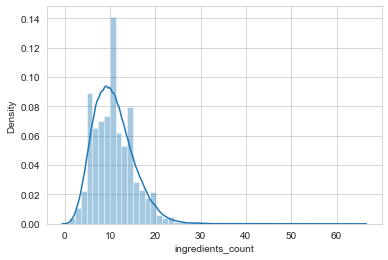

In [23]:
sns.distplot(df['ingredients_count'])

In [22]:
import matplotlib.pyplot as plt

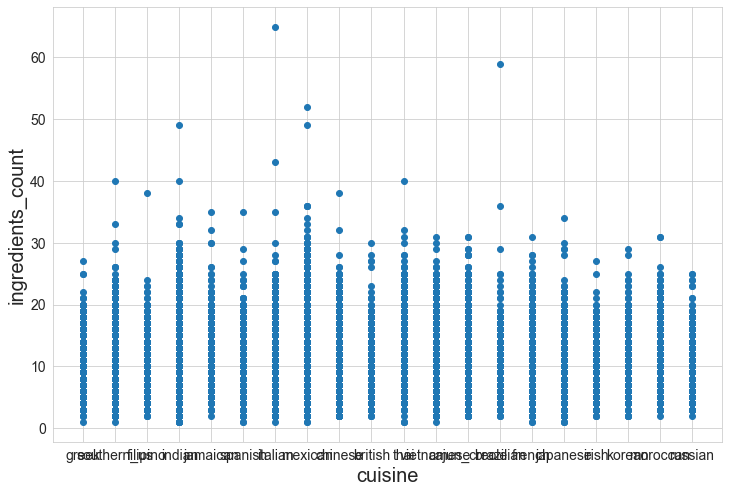

In [28]:
plt.figure(figsize=(12,8))

plt.scatter(df.cuisine,
               df.ingredients_count)


plt.xlabel("cuisine", fontsize=20)
plt.ylabel("ingredients_count", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

The distribution of the number of ingredietns used by cuisine looks similar.

In [31]:
plt.close()

In [32]:
pd.get_dummies(df, columns = ['cuisine'])

,id,ingredients,refined_ingredients,ingredients_count,cuisine_brazilian,cuisine_british,cuisine_cajun_creole,cuisine_chinese,cuisine_filipino,cuisine_french,...,cuisine_jamaican,cuisine_japanese,cuisine_korean,cuisine_mexican,cuisine_moroccan,cuisine_russian,cuisine_southern_us,cuisine_spanish,cuisine_thai,cuisine_vietnamese
0,10259,"[romaine lettuce, black olives, grape tomatoes...","(romaine lettuce, black olives, grape tomatoes...",9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,"[plain flour, ground pepper, salt, tomatoes, g...","(plain flour, ground pepper, salt, tomatoes, g...",11,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","(eggs, pepper, salt, mayonaise, cooking oil, g...",12,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,"[water, vegetable oil, wheat, salt]","(water, vegetable oil, wheat, salt)",4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,"[black pepper, shallots, cornflour, cayenne pe...","(black pepper, shallots, cornflour, cayenne pe...",20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,"[light brown sugar, granulated sugar, butter, ...","(light brown sugar, granulated sugar, butter, ...",12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,"[KRAFT Zesty Italian Dressing, purple onion, b...","(kraft zesty italian dressing, purple onion, b...",7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,"[eggs, citrus fruit, raisins, sourdough starte...","(eggs, citrus fruit, raisins, sourdough starte...",12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,"[boneless chicken skinless thigh, minced garli...","(boneless chicken skinless thigh, minced garli...",21,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


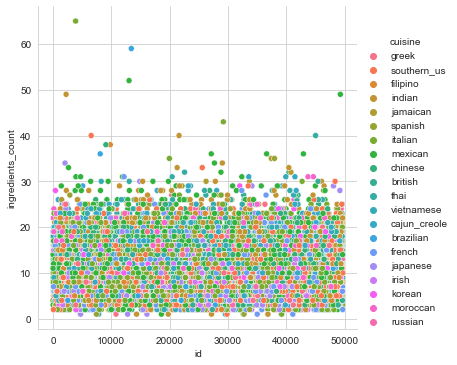

In [36]:
sns.relplot(x='id', y='ingredients_count', hue='cuisine', data=df)

### Filter by special ingredients

In [37]:
df.index

RangeIndex(start=0, stop=39774, step=1)

In [39]:
cuisine = pd.get_dummies(df, columns = ['cuisine'])

In [40]:
def cuisine_vector(row):
    v = []
    for i in range(20):
        v.append(cuisine.iloc[row][int(4+i)])
    return v
    

In [41]:
# For an ingredient, if it shows up in a cuisine, say 'italian', 
# then we store them in a dictionary with 
# key-the ingredient & value- 'italian'

ingredient_cuisine = {}
for i in df.index:
    for ingredient in df['refined_ingredients'][i]:
        if ingredient not in ingredient_cuisine:
            ingredient_cuisine[ingredient] = tuple(cuisine_vector(i))
        else:
            ingredient_cuisine[ingredient] = tuple(np.array(ingredient_cuisine[ingredient]) + np.array(cuisine_vector(i)))
    
        
    

In [44]:
ingredient_cuisine['black olives']

(0, 0, 2, 0, 0, 21, 31, 0, 0, 67, 0, 0, 0, 92, 8, 1, 3, 4, 0, 0)

In [45]:
len(ingredient_cuisine)

6690

We print a special type of ingredients which appear only for a single cuisine.

In [46]:
low_frequency_ingredients = []
single_cuisine_ingredients = []
all_cuisine_ingredients=[]
two_cuisine_ingredients = []
three_cuisine_ingredients = []

for key, val in ingredient_cuisine.items():
    if sum(val) == 1:
        low_frequency_ingredients.append(key)
    if 0 in pd.Series(val).value_counts() and pd.Series(val).value_counts()[0] == 19:
        single_cuisine_ingredients.append(key)
    elif 0 in pd.Series(val).value_counts() and pd.Series(val).value_counts()[0] == 18:
        two_cuisine_ingredients.append(key)
    elif 0 in pd.Series(val).value_counts() and pd.Series(val).value_counts()[0] == 17:
        three_cuisine_ingredients.append(key)
    elif 0 not in pd.Series(val).value_counts():
        all_cuisine_ingredients.append(key)
        

In [84]:
len(two_cuisine_ingredients)

1001

In [61]:
four = []
five = []
six = []
for key, val in ingredient_cuisine.items():
    if 0 in pd.Series(val).value_counts() and pd.Series(val).value_counts()[0] == 16:
        four.append(key)
    elif 0 in pd.Series(val).value_counts() and pd.Series(val).value_counts()[0] == 15:
        five.append(key)
    elif 0 in pd.Series(val).value_counts() and pd.Series(val).value_counts()[0] == 14:
        six.append(key)

        

In [ ]:
level_4=[]

In [85]:
showup_level = np.zeros(20)
for i in range(1,20):
    count = 0
    for key, val in ingredient_cuisine.items():
        if 0 in pd.Series(val).value_counts() and pd.Series(val).value_counts()[0] == 20-i:
            count += 1
    showup_level[i-1] = count
    

In [86]:
showup_level[19] = 104

In [87]:
showup_level

array([2587., 1001.,  584.,  458.,  324.,  257.,  221.,  176.,  160.,
        126.,  110.,   98.,   80.,   77.,   72.,   62.,   65.,   57.,
         71.,  104.])

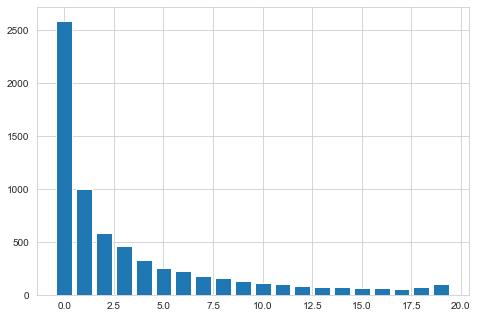

In [93]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = np.arange(20)
y = showup_level
ax.bar(x,y)
plt.show()

In [63]:
len(four)

458

In [64]:
len(five)

324

In [66]:
len(six)

257

In [48]:
print("There are " + str(len(low_frequency_ingredients)) + " ingredients that are used only once in the total of recipes in the training set.")
print("For example, 'white almond bark', 'chestnut flour', or 'taiwanese bok choy'.")

There are 1754 ingredients that are used only once in the total of recipes in the training set.
For example, 'white almond bark', 'chestnut flour', or 'taiwanese bok choy'.


In [49]:
len(single_cuisine_ingredients)

2587

In [53]:
len(two_cuisine_ingredients)

1001

In [54]:
len(three_cuisine_ingredients)

584

68% of ingredients among single cuisine ingredients appears only once in the data set.

In [51]:
len(all_cuisine_ingredients)

104

In [ ]:
cuisine_index_to_name = {}
for i in range(20):
    cuisine_index_to_name[i] = cuisine.columns[4:][i]


In [ ]:
cuisine_index_to_name

In [ ]:
single_cuisine_ingredients_dict = {}
for ingredient in single_cuisine_ingredients:
    ind  = np.nonzero(ingredient_cuisine[ingredient])[0][0]
    single_cuisine_ingredients_dict[ingredient] = cuisine_index_to_name[np.nonzero(ingredient_cuisine[ingredient])[0][0]]

In [ ]:
df2 = pd.DataFrame(single_cuisine_ingredients_dict.items())

df2.groupby(df2.iloc[:,1])

In [ ]:
df2.iloc[:,1].value_counts().plot(kind = 'pie', figsize=(10,8),subplots=True,title = 'special ingredients by cuisine', legend = False)

In [ ]:
single_minus_low = list(set(single_cuisine_ingredients)-set(low_frequency_ingredients))

In [ ]:
single_minus_low_dict = {}
for ingredient in single_minus_low:
    ind  = np.nonzero(ingredient_cuisine[ingredient])[0][0]
    single_minus_low_dict[ingredient] = cuisine_index_to_name[np.nonzero(ingredient_cuisine[ingredient])[0][0]]

In [ ]:
df3 = pd.DataFrame(single_minus_low_dict.items())

In [ ]:
df2.iloc[:,1].value_counts()

In [ ]:
df3.iloc[:,1].value_counts().plot(kind = 'pie', figsize=(10,8),subplots=True,title = 'special ingredients by cuisine', legend = False)

In [ ]:
single_minus_low_dict

### Ingredients per cuisine

In [55]:
ingredient_cuisine

{'romaine lettuce': (0,
  0,
  12,
  13,
  0,
  12,
  39,
  3,
  1,
  33,
  0,
  0,
  5,
  103,
  0,
  0,
  8,
  4,
  20,
  17),
 'black olives': (0,
  0,
  2,
  0,
  0,
  21,
  31,
  0,
  0,
  67,
  0,
  0,
  0,
  92,
  8,
  1,
  3,
  4,
  0,
  0),
 'grape tomatoes': (0,
  0,
  5,
  2,
  1,
  13,
  26,
  5,
  0,
  98,
  0,
  1,
  0,
  53,
  0,
  0,
  14,
  6,
  4,
  0),
 'garlic': (82,
  34,
  114,
  251,
  69,
  214,
  216,
  214,
  51,
  191,
  139,
  166,
  47,
  37,
  143,
  20,
  3,
  128,
  158,
  239),
 'pepper': (56,
  88,
  189,
  158,
  199,
  209,
  203,
  205,
  87,
  197,
  125,
  62,
  99,
  38,
  94,
  59,
  37,
  133,
  81,
  71),
 'purple onion': (8,
  11,
  38,
  33,
  13,
  64,
  186,
  170,
  3,
  94,
  26,
  14,
  8,
  106,
  67,
  8,
  95,
  55,
  84,
  45),
 'seasoning': (1,
  2,
  25,
  11,
  2,
  1,
  3,
  5,
  2,
  12,
  4,
  5,
  5,
  31,
  2,
  1,
  17,
  2,
  4,
  2),
 'garbanzo beans': (0,
  0,
  2,
  1,
  5,
  1,
  23,
  36,
  0,
  18,
  0,
  0,
  0,
  1

In [56]:
cuisine = df["cuisine"].unique()

all_cus = dict()
for cs in cuisine:
    i = []
    for ing_list in df[df['cuisine']==cs]['ingredients']:
        for ing in ing_list:
            i.append(ing)
    all_cus[cs] = i

all_cus.keys()

dict_keys(['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian'])

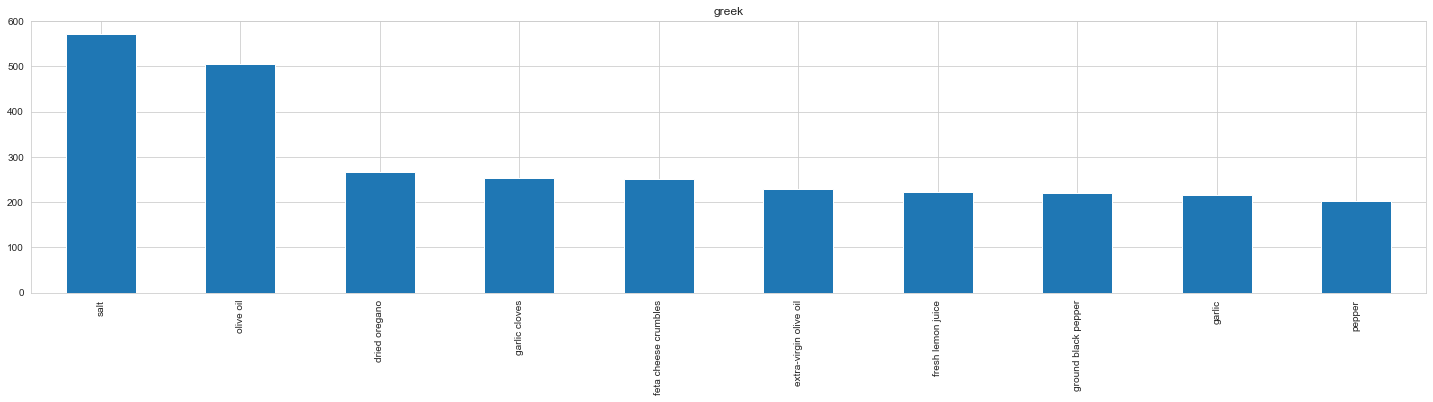

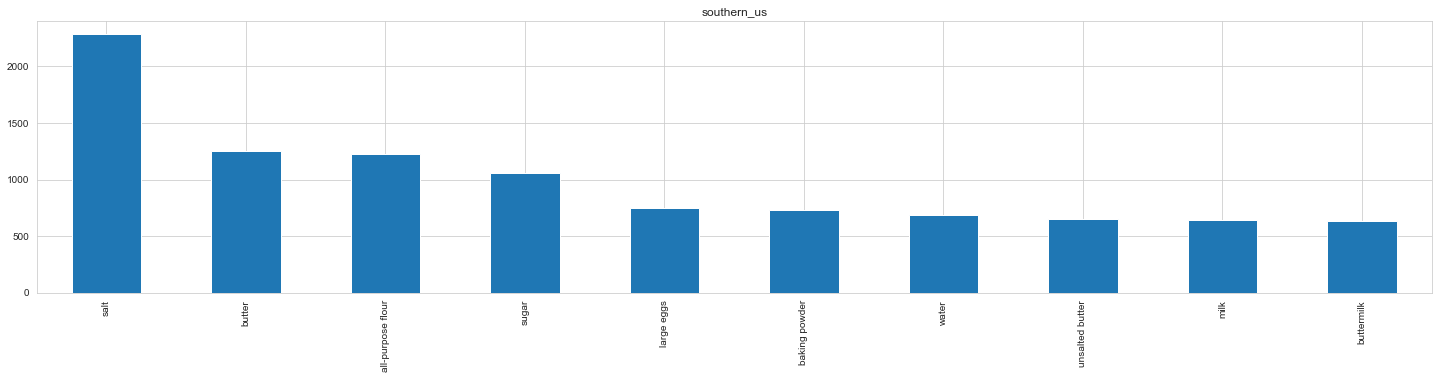

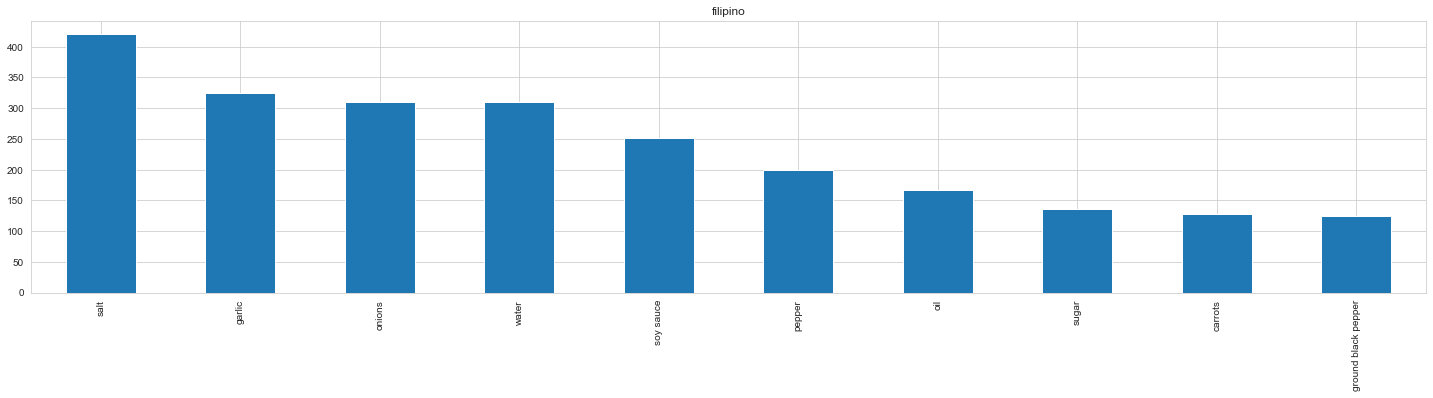

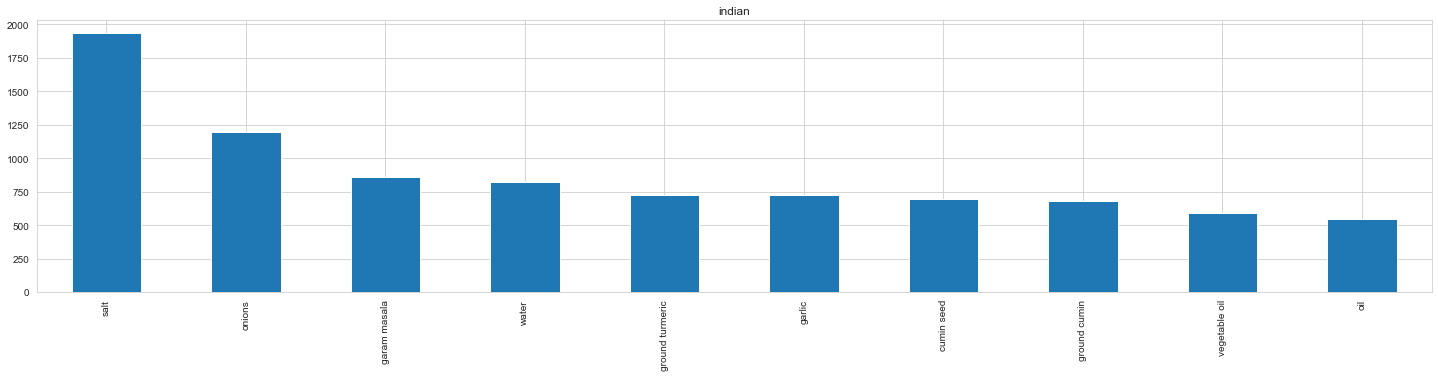

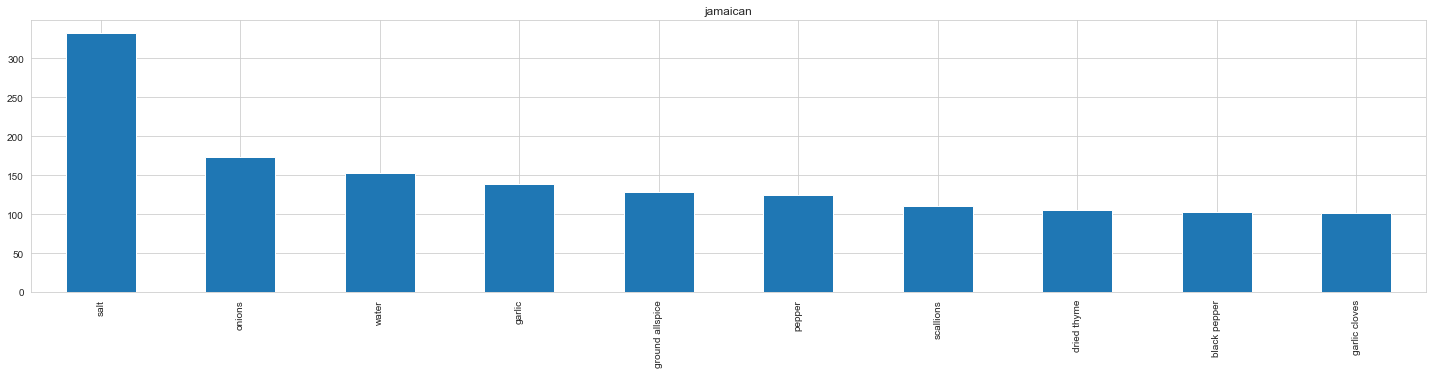

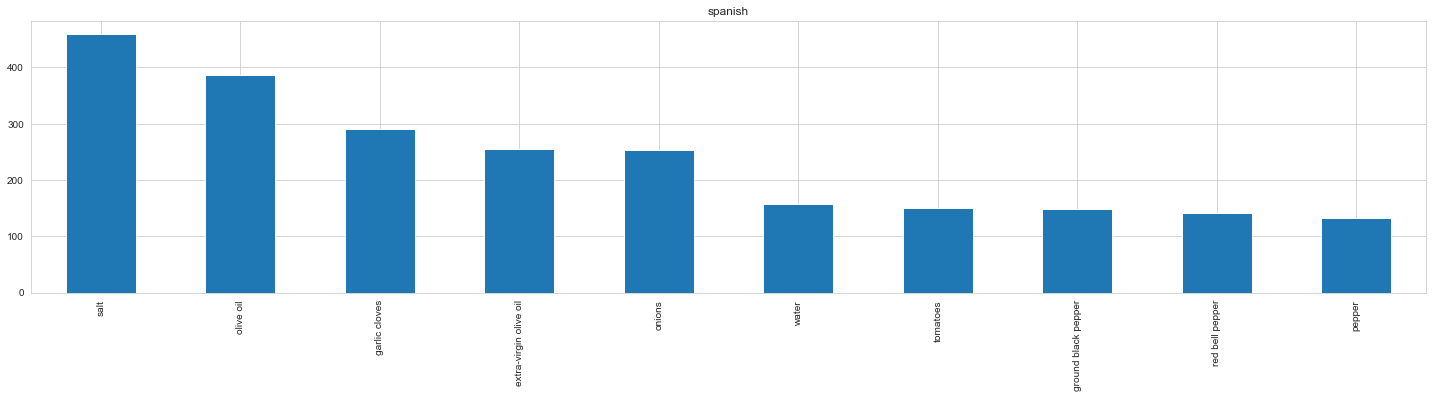

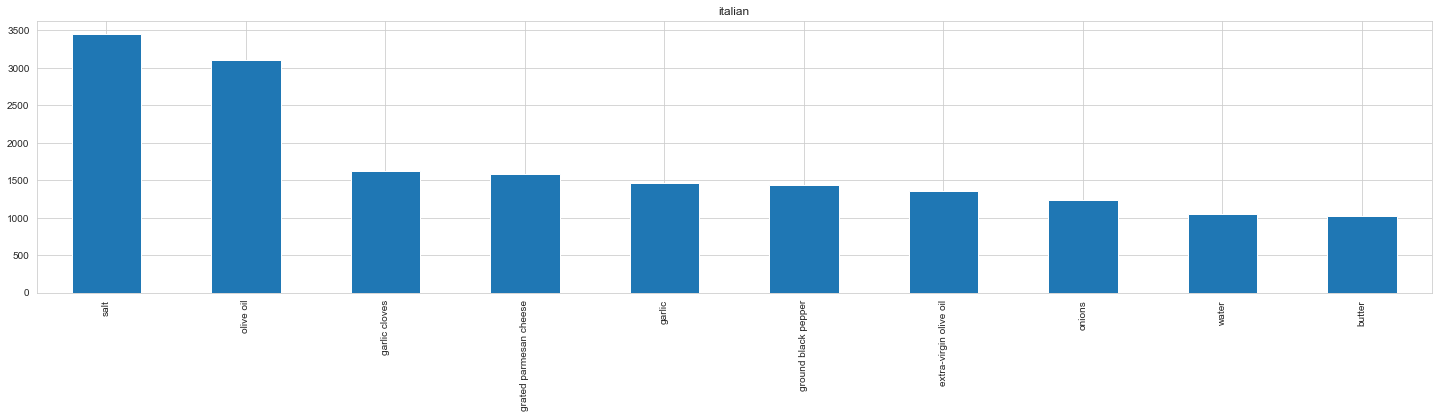

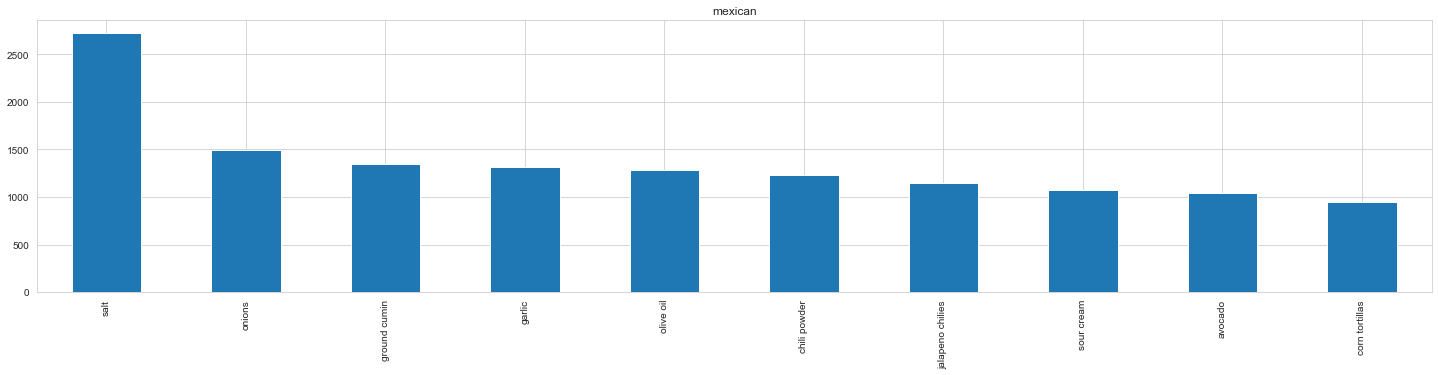

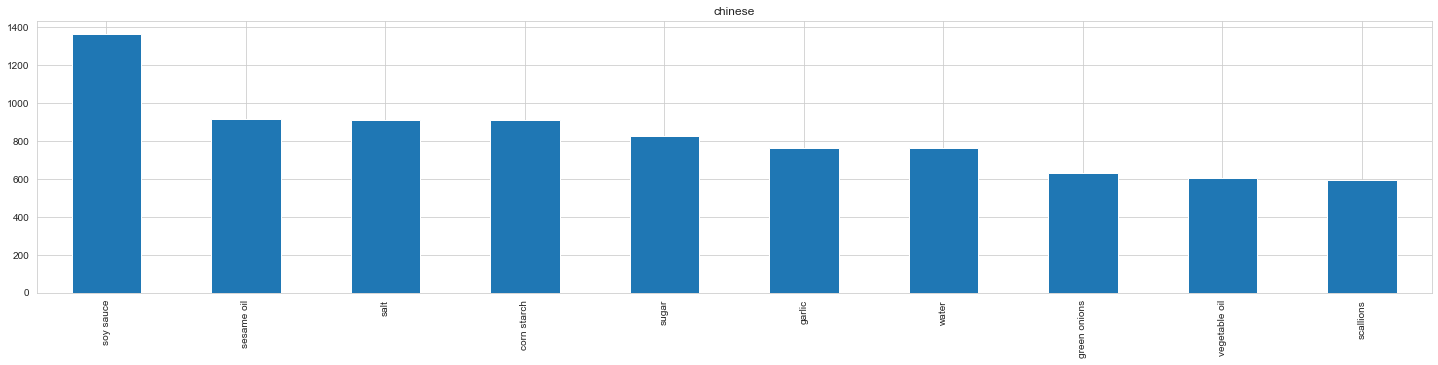

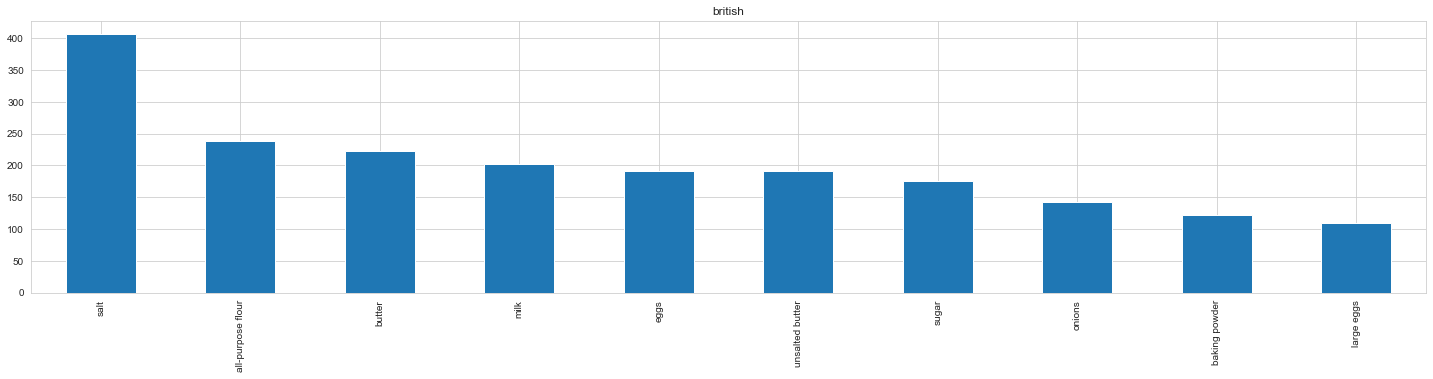

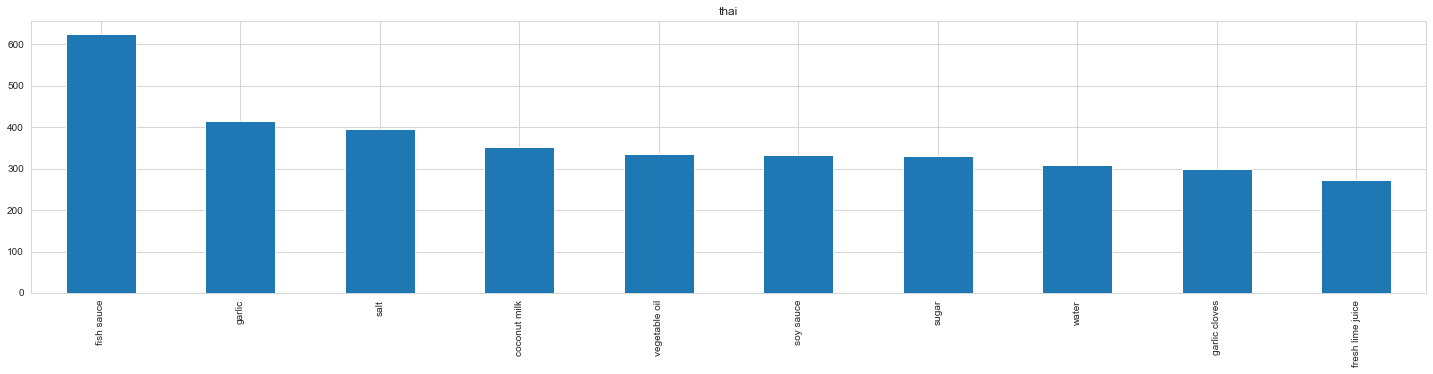

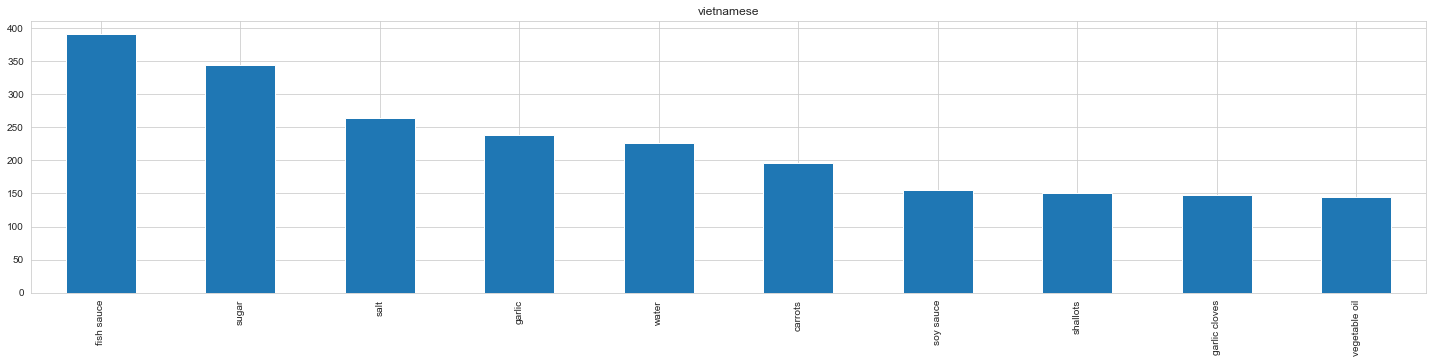

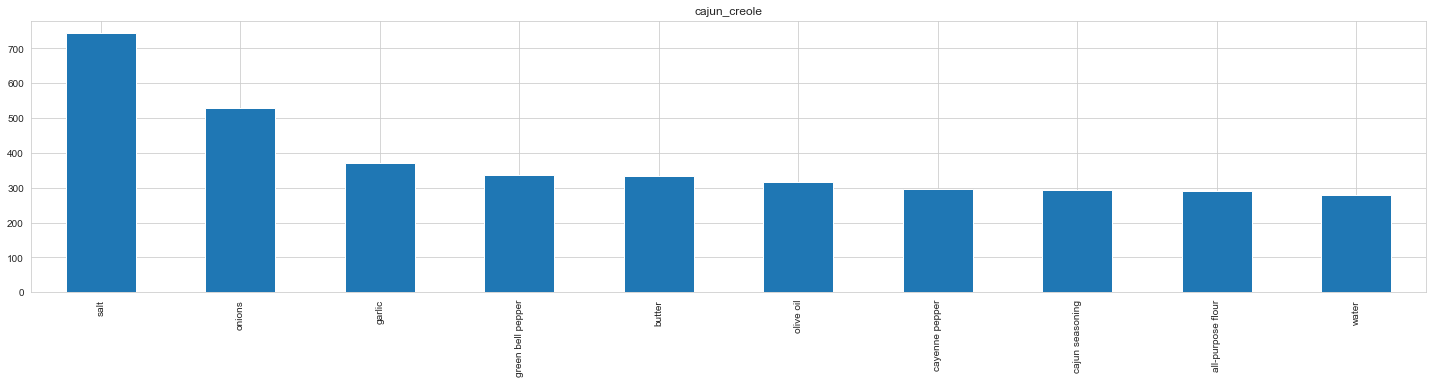

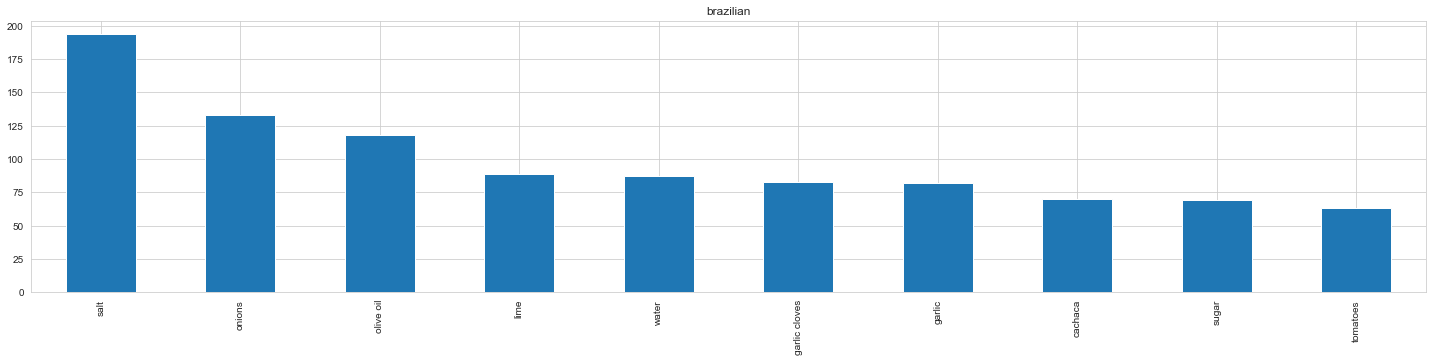

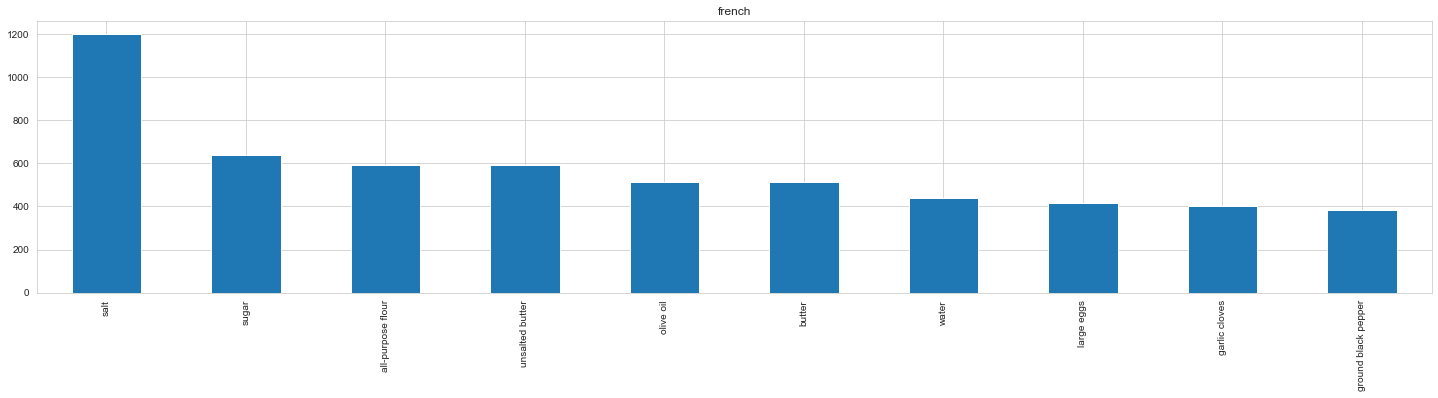

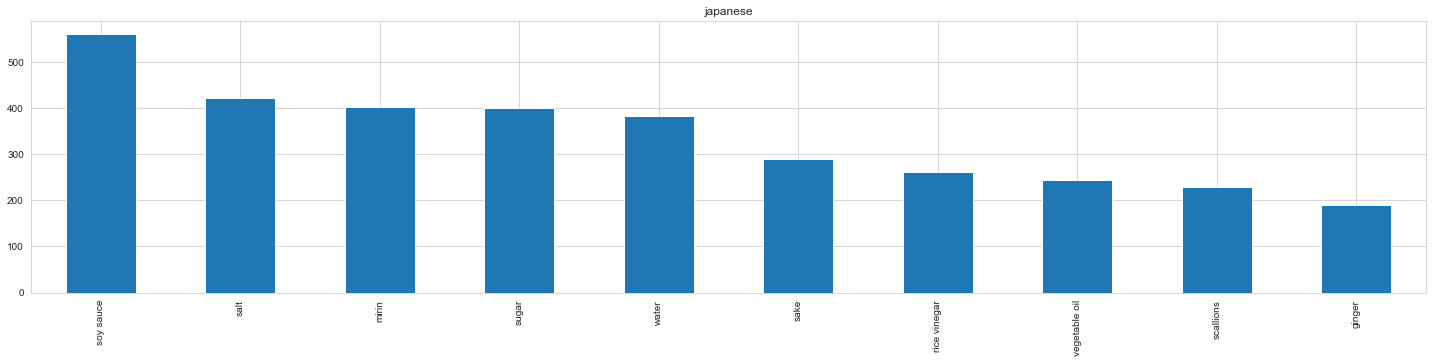

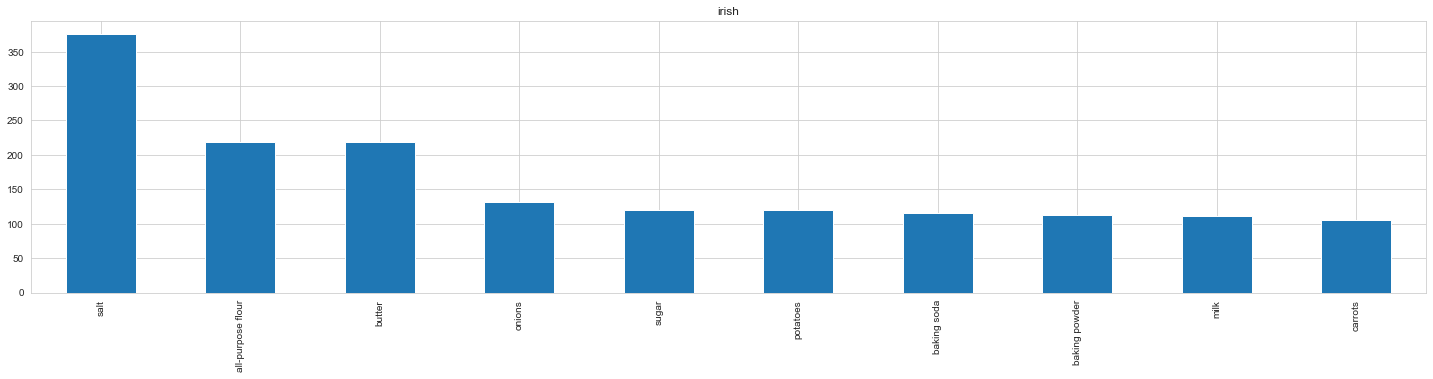

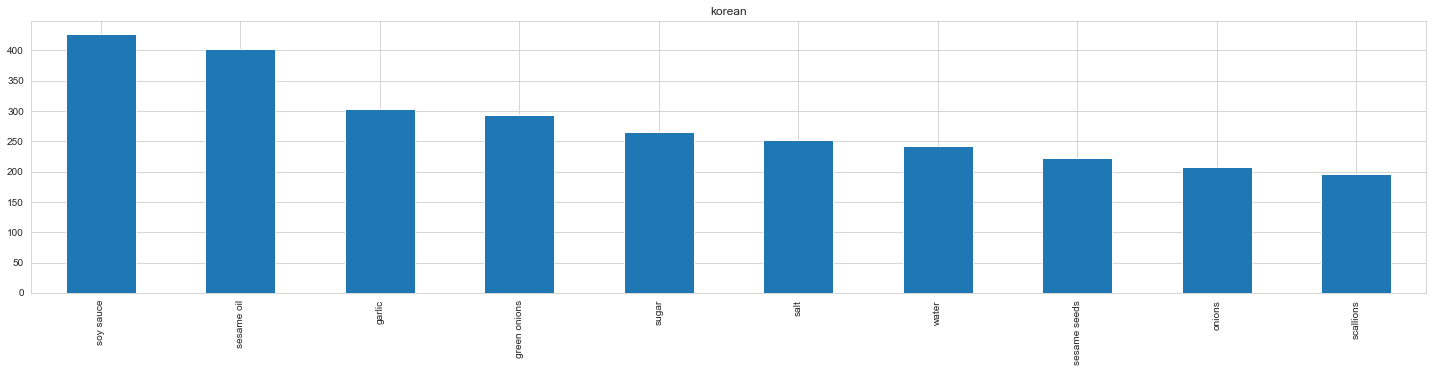

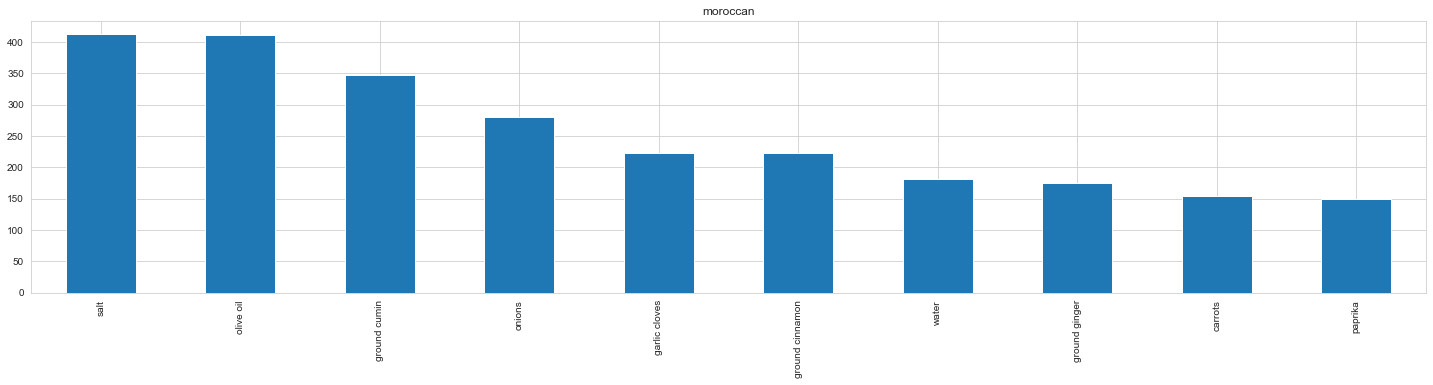

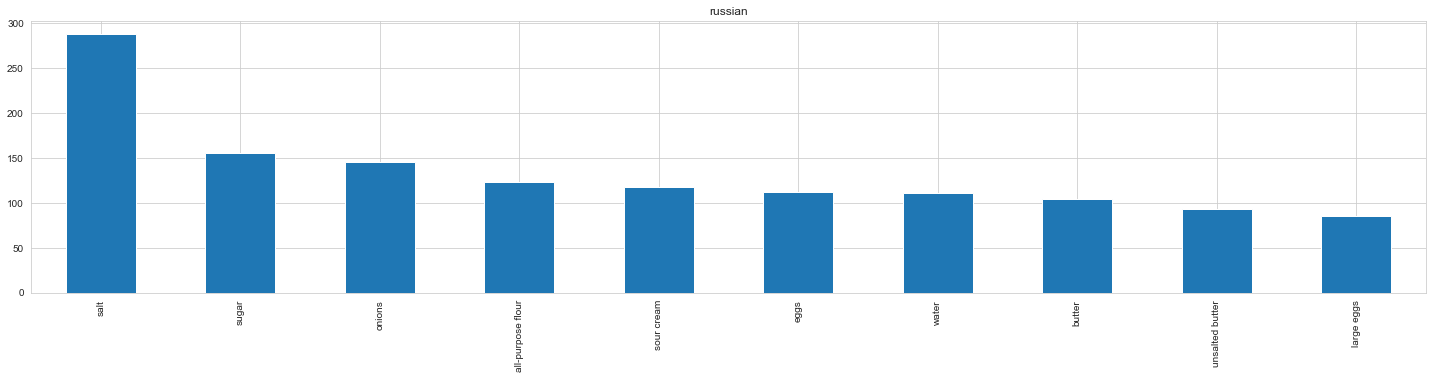

In [60]:
for key in all_cus.keys():
    fig, ax = plt.subplots(figsize=(25,5))
    pd.Series(all_cus[key]).value_counts().head(10).plot.bar(ax=ax, title=key)
    plt.show()

In [95]:
a = 1
